# Analysis of Police Activity(Rhode Island)

## Introduction
This project is about the analysis of police activities in Rhode Island which is a state in USA . Here  we will use try to analyse various conditions which affects the police activities on road . This kind of analysis is important to find the behaviour of police towards the people in different conditions and people's behaviour towards rules and police. This type of project comes under the category  of EDA (Exploratory Data Analysis). 

In [82]:
#Importing the pandas library as pd
import pandas as pd
from pandas.api.types import CategoricalDtype

# Reading  'police.csv' into a DataFrame named ri
ri = pd.read_csv("D:/jupyter_workspace/Analyzing_Police_Activity_Rhode_Island/police.csv")

# Examining the head of the DataFrame
ri.head()




,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
ri.shape

(91741, 15)

In [11]:
ri.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [7]:
# Counting the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


In [13]:
#Dropping the unwawnted column here we see county name is useless as all values are null.
ri.drop("county_name",axis=1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
# Droping all rows that are missing 'driver_gender'
ri.dropna(subset=["driver_gender"], inplace=True)

# Counting the number of missing values in each column (again)
print(ri.isnull().sum())

# Examining the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
county_name           86406
driver_gender             0
driver_age_raw            1
driver_age              293
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64
(86406, 15)


In [15]:
# data type of all columns
ri.dtypes


stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [16]:
# Examining the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Changing the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype("bool")



0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [17]:
# Checking the data type of 'is_arrested' 
print(ri.is_arrested.dtypes)

bool


In [18]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=" ")

# Converting 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)



In [19]:
# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object


In [20]:
# Set 'stop_datetime' as the index
ri.set_index("stop_datetime", inplace=True)

# Examining the index
print(ri.index)

# Examining the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-18 08:15:00',
               '2005-01-23 23:15:00', '2005-02-20 17:15:00',
               '2005-03-14 10:00:00', '2005-03-23 09:45:00',
               '2005-04-01 17:30:00', '2005-06-06 13:20:00',
               '2005-07-13 10:15:00', '2005-07-13 15:45:00',
               ...
               '2015-12-31 16:38:00', '2015-12-31 19:44:00',
               '2015-12-31 19:55:00', '2015-12-31 20:20:00',
               '2015-12-31 20:25:00', '2015-12-31 20:27:00',
               '2015-12-31 20:35:00', '2015-12-31 20:45:00',
               '2015-12-31 21:42:00', '2015-12-31 22:46:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86406, freq=None)
Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='obj

In [21]:
# Count9ing the unique values in 'violation'
print(ri.violation.value_counts())

# Expressing the counts as proportions
print(ri.violation.value_counts(normalize=True ))

Speeding               48461
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64
Speeding               0.560852
Moving violation       0.187765
Equipment              0.127537
Other                  0.049962
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64


In [22]:
# Creating a DataFrame of female drivers
female = ri[ri.driver_gender=="F"]

# Creating a DataFrame of male drivers
male = ri[ri.driver_gender=="M"]


In [23]:
# Computing the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True ))


Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64


In [24]:
# Computing the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True ))

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64


## Analyzing the  stop_outcomes for both the genders and same violations

In [25]:
# Creating a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Creating a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]


In [26]:
# Computing the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))


Citation            0.952590
Warning             0.039917
Arrest Driver       0.005361
Arrest Passenger    0.000840
N/D                 0.000840
No Action           0.000452
Name: stop_outcome, dtype: float64


In [27]:
# Computing the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.946208
Warning             0.035265
Arrest Driver       0.015161
Arrest Passenger    0.001243
No Action           0.001061
N/D                 0.001061
Name: stop_outcome, dtype: float64


Here we see that "Citation" which means ticket is more in the case of female and the "Warning" is more in case of female which means more female get ticket and more female driver get warnings .

In [28]:
# Checking the data type of 'search_conducted'
print(ri.search_conducted.dtypes)

# Calculating the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculating the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963012
True     0.036988
Name: search_conducted, dtype: float64
0.036988172117677014


In [29]:
# Calculating the search rate for female drivers
print(ri[ri.driver_gender=="F"].search_conducted.mean())

0.02003317596018885


In [30]:
# Calculating the search rate for each combination of gender and violation
print(ri.groupby(["driver_gender", "violation"]).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64


In [31]:
print(ri.groupby(["violation", "driver_gender"]).search_conducted.mean())

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64


We firstly grouped according to genders then violation but we may get confused because it may be the case that both genders may have done different number of violations therefore we reversed the the grouping order and we see that search rate is higher in case of males in almost every violation.

## Analyzing what happens when search is conducted 

In [32]:
# Counting the 'search_type' values
print(ri.search_type.value_counts())


Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

In [33]:
# Checking if 'search_type' contains the string 'Protective Frisk'   
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False) #saves protective frisk as True and others as false

In [34]:
# Checking the data type of 'frisk'
print(ri.frisk.dtypes)

bool


In [37]:
# Taking the sum of 'frisk'
print(ri.frisk.sum())

274


Frisk is situation where police use power and weapon to control the situation.

In [38]:
# Creating a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]


In [39]:
# Calculating  the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())


0.08573216520650813


In [40]:
# Calculating the frisk rate for each gender
print(searched.groupby("driver_gender").frisk.mean())

driver_gender
F    0.061571
M    0.089908
Name: frisk, dtype: float64


## Analyzing the arrest according to time .

In [41]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.03389810892762077


In [42]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.047393
1     0.061428
2     0.062914
3     0.053221
4     0.074074
5     0.031915
6     0.014045
7     0.013498
8     0.020449
9     0.024703
10    0.025278
11    0.027037
12    0.032999
13    0.030100
14    0.032716
15    0.032307
16    0.030765
17    0.032757
18    0.043988
19    0.031506
20    0.041048
21    0.053795
22    0.043397
23    0.042825
Name: is_arrested, dtype: float64


In [43]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()


In [44]:
# Importing  matplotlib.pyplot as plt
import matplotlib.pyplot as plt



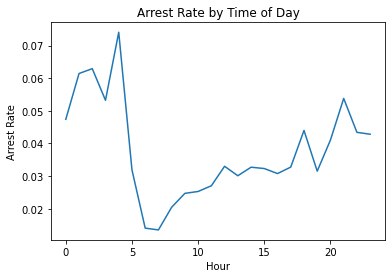

In [45]:
# Creating a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Adding  the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

# Displaying the plot
plt.show()

stop_datetime
2005-12-31    0.007186
2006-12-31    0.005818
2007-12-31    0.007524
2008-12-31    0.006993
2009-12-31    0.011607
2010-12-31    0.008721
2011-12-31    0.008449
2012-12-31    0.010870
2013-12-31    0.011858
2014-12-31    0.013335
2015-12-31    0.010448
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


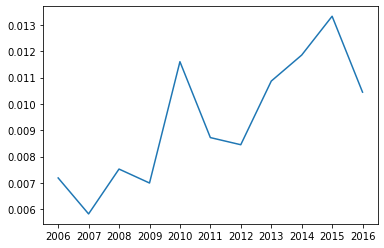

In [46]:
# Calculating the annual rate of drug-related stops
print(ri.drugs_related_stop.resample("A").mean())

# Saved the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

# Creating a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Displaying the plot
plt.show()

As we can see,  the rate of drug-related stops increased significantly between 2005 and 2015. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. 

               drugs_related_stop  search_conducted
stop_datetime                                      
2005-12-31               0.007186          0.051098
2006-12-31               0.005818          0.040134
2007-12-31               0.007524          0.040876
2008-12-31               0.006993          0.036069
2009-12-31               0.011607          0.052646


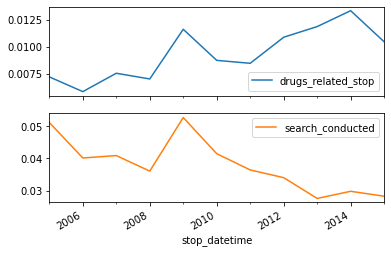

In [48]:
# Calculating and save the annual search rate
annual_search_rate = ri.search_conducted.resample("A").mean()

# Concatenated 'annual_drug_rate' and 'annual_search_rate'         
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

print(annual.head()) # Concatenated along columns means placing two columns side by side 

# Create subplots from 'annual'
annual.plot(subplots=True)

# Displaying the subplots
plt.show()

Here we can see that our hypothesis was not correct as search_conducted decreased with annually .

## Analyzing stop duration for various violations

In [51]:
# Printing the unique values in 'stop_duration'
print(ri.stop_duration.unique())



['0-15 Min' '16-30 Min' '30+ Min' '2' '1']


In [52]:
# Storing mean integer value as stop_duration which makes analysis more  easier to find stop_duration time.
# Creating a dictionary that maps strings to integers   
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45} 

# Converting the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Printing the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

[ 8. 23. 45. nan]


In [54]:
# Calculating the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby("violation_raw").stop_minutes.mean())

# Saving the resulting Series as 'stop_length'
stop_length = ri.groupby("violation_raw").stop_minutes.mean()



violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577796
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64


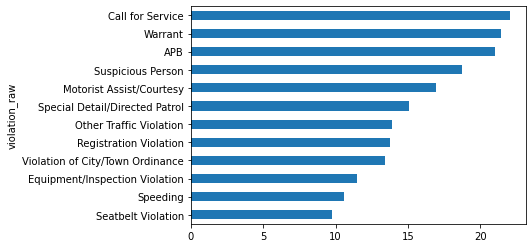

In [55]:
# Sorting 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind="barh")

# Displaying the plot
plt.show()

## Analysis of Weather Data along with police activity 

In [61]:
# Reading 'weather.csv' into a DataFrame named 'weather'
weather=pd.read_csv("D:/jupyter_workspace/Analyzing_Police_Activity_Rhode_Island/weather.csv")
weather.head()


,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [62]:
# Describing the temperature columns
print(weather[["TMIN","TAVG","TMAX"]].describe())

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


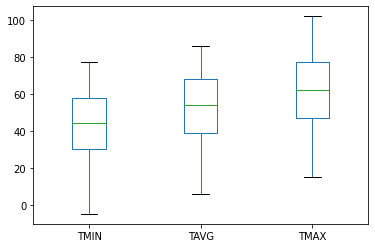

In [57]:
# Creating a box plot of the temperature columns
weather[["TMIN","TAVG","TMAX"]].plot(kind='box')

# Displaying the plot
plt.show()

In [58]:
# Creating a 'TDIFF' column that represents temperature difference
weather["TDIFF"]=weather.TMAX-weather.TMIN

# Describing the 'TDIFF' column
print(weather["TDIFF"].describe())



count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


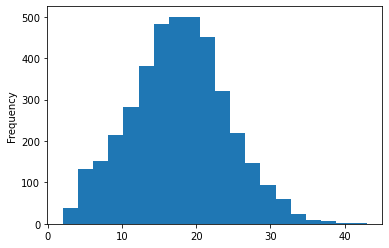

In [59]:
# Creating a histogram with 20 bins to visualize 'TDIFF'
weather["TDIFF"].plot(kind="hist",bins=20)

# Displaying the plot
plt.show()

The weather DataFrame contains 22 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

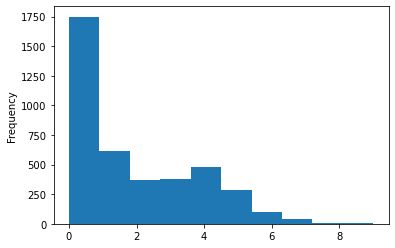

In [68]:
# Copying 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, "WT01":"WT22"]


# Calculating the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replacing missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Creating a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind="hist")

# Displaying the plot
plt.show()

In [70]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4


In [71]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())



0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [72]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad',3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [85]:
# Creating a list of weather ratings in logical order
cats=["good","bad","worse"]

# Changing the data type of 'rating' to category
cat_type = CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather["rating"].astype(cat_type)

# Examining head of 'rating'
print(weather["rating"].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [86]:
# Reseting the index of 'ri'
ri.reset_index(inplace=True)

# Examining the head of 'ri'
print(ri.head())


   index   stop_date stop_time  county_name driver_gender  driver_age_raw  \
0      0  2005-01-02     01:55          NaN             M          1985.0   
1      1  2005-01-18     08:15          NaN             M          1965.0   
2      2  2005-01-23     23:15          NaN             M          1972.0   
3      3  2005-02-20     17:15          NaN             M          1986.0   
4      4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_related_stop  
0        

In [87]:
# Creating a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[["DATE","rating"]]

# Examining the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [88]:
# Examining the shape of 'ri'
print(ri.shape)



(91741, 16)


In [93]:
# Merging 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examining the shape of 'ri_weather'
print(ri_weather.shape)
ri_weather.head()


(91741, 18)


,index,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,DATE,rating
0,0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02,bad
1,1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18,good
2,2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23,worse
3,3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20,bad
4,4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14,good


In [94]:
ri_weather.dtypes

index                    int64
stop_date               object
stop_time               object
county_name            float64
driver_gender           object
driver_age_raw         float64
driver_age             float64
driver_race             object
violation_raw           object
violation               object
search_conducted          bool
search_type             object
stop_outcome            object
is_arrested             object
stop_duration           object
drugs_related_stop        bool
DATE                    object
rating                category
dtype: object

In [97]:
# Setting 'stop_datetime' as the index of 'ri_weather'
ri_weather["stop_datetime"] = ri.stop_date.str.cat(ri.stop_time, sep=" ")
ri['stop_datetime'] = pd.to_datetime(combined)
ri_weather.set_index("stop_datetime",inplace=True )


In [98]:
ri_weather.head()

,index,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,
2005-01-02 01:55,0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02,bad
2005-01-18 08:15,1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18,good
2005-01-23 23:15,2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23,worse
2005-02-20 17:15,3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20,bad
2005-03-14 10:00,4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14,good


In [99]:
# Calculating the overall arrest rate
print(ri_weather.is_arrested.mean())

0.033897324321822055


In [103]:
ri_weather['is_arrested'] = ri_weather.is_arrested.astype("bool")

In [115]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.051874
                     bad       0.058137
                     worse     0.098385
Moving violation     good      0.056034
                     bad       0.054080
                     worse     0.066807
Other                good      0.080735
                     bad       0.085547
                     worse     0.051643
Registration/plates  good      0.085227
                     bad       0.110013
                     worse     0.096970
Seat belt            good      0.028602
                     bad       0.019196
                     worse     0.000000
Speeding             good      0.012606
                     bad       0.013237
                     worse     0.015357
Name: is_arrested, dtype: float64


In [109]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])



0.054079696394686905


In [108]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.012606
bad      0.013237
worse    0.015357
Name: is_arrested, dtype: float64


In [111]:
# Unstacking the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())


rating                   good       bad     worse
violation                                        
Equipment            0.051874  0.058137  0.098385
Moving violation     0.056034  0.054080  0.066807
Other                0.080735  0.085547  0.051643
Registration/plates  0.085227  0.110013  0.096970
Seat belt            0.028602  0.019196  0.000000
Speeding             0.012606  0.013237  0.015357


In [112]:
Using 
# Creating the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.051874  0.058137  0.098385
Moving violation     0.056034  0.054080  0.066807
Other                0.080735  0.085547  0.051643
Registration/plates  0.085227  0.110013  0.096970
Seat belt            0.028602  0.019196  0.000000
Speeding             0.012606  0.013237  0.015357
